In [1]:
import pandas as pd


In [2]:
column_names = ["age", "sex", "cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
data_list =[]

df1 = pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/UCI original/processed.cleveland.data", names = column_names)
df2 = pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/UCI original/processed.hungarian.data", names = column_names)
df3 = pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/UCI original/processed.switzerland.data", names = column_names)
df4 = pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/UCI original/processed.va.data", names = column_names)


df1_1= df1.append(df2)
df2_2= df3.append(df4)

df_final= df1_1.append(df2_2)


print(df_final.head())

    age  sex   cp trestbps chol fbs restecg thalach exang oldpeak slope   ca  \
0  63.0  1.0  1.0      145  233   1       2     150     0     2.3     3  0.0   
1  67.0  1.0  4.0      160  286   0       2     108     1     1.5     2  3.0   
2  67.0  1.0  4.0      120  229   0       2     129     1     2.6     2  2.0   
3  37.0  1.0  3.0      130  250   0       0     187     0     3.5     3  0.0   
4  41.0  0.0  2.0      130  204   0       2     172     0     1.4     1  0.0   

  thal  num  
0  6.0    0  
1  3.0    2  
2  7.0    1  
3  3.0    0  
4  3.0    0  


In [3]:
print(df_final.info())
print(df_final.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 107.8+ KB
None
(920, 14)


In [4]:
print(df_final.describe())

              age         sex          cp         num
count  920.000000  920.000000  920.000000  920.000000
mean    53.510870    0.789130    3.250000    0.995652
std      9.424685    0.408148    0.930969    1.142693
min     28.000000    0.000000    1.000000    0.000000
25%     47.000000    1.000000    3.000000    0.000000
50%     54.000000    1.000000    4.000000    1.000000
75%     60.000000    1.000000    4.000000    2.000000
max     77.000000    1.000000    4.000000    4.000000


In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [6]:
df_final =  df_final.replace('?', np.nan) # All data frame
df_final.to_csv('df1.csv', encoding='utf-8')


In [7]:
print(df_final.info())
print(df_final.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    object 
 4   chol      890 non-null    object 
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalach   865 non-null    object 
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    object 
 10  slope     611 non-null    object 
 11  ca        309 non-null    object 
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 107.8+ KB
None
(920, 14)


In [123]:
print(df_final.isnull().sum())


from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
dataframe = pd.DataFrame(my_imputer.fit_transform(df_final))
dataframe.columns = df_final.columns


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [124]:
print(dataframe.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [43]:
#"trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"








In [125]:


print(dataframe.describe())
dataframe.num.value_counts()

              age         sex          cp    trestbps        chol         fbs  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean    53.510870    0.789130    3.250000  132.132404  199.130337    0.166265   
std      9.424685    0.408148    0.930969   18.443895  108.957634    0.353831   
min     28.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%     47.000000    1.000000    3.000000  120.000000  177.750000    0.000000   
50%     54.000000    1.000000    4.000000  130.000000  221.000000    0.000000   
75%     60.000000    1.000000    4.000000  140.000000  267.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  603.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean     0.604575  137.545665    0.389595    0.878788    1.770867    0.676375   
std      0.804950   25.1384

0.0    411
1.0    265
2.0    109
3.0    107
4.0     28
Name: num, dtype: int64

In [129]:

dataframe=dataframe.drop(['ca'], axis=1)
dataframe=dataframe.drop(['thal'], axis=1)
dataframe.to_csv('pre13.csv', encoding='utf-8')

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [336]:
d=pd.read_csv('/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/Notebook/pre13.csv',index_col=0)
#Desktop/IDP/IDP_3-2 finals/Algorithm/Datasets/three.csv

In [337]:
d.head()
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    float64
 6   restecg   920 non-null    float64
 7   thalach   920 non-null    float64
 8   exang     920 non-null    float64
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    float64
 11  num       920 non-null    float64
dtypes: float64(12)
memory usage: 93.4 KB


In [338]:
d.num = d.num.where(d.num < 1, 1)

In [339]:
d.num.value_counts()

1.0    509
0.0    411
Name: num, dtype: int64

In [340]:
X = d.drop(['num'], axis=1).values
y = d['num'].values

In [341]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.35, random_state=2021)

In [342]:
#X.to_csv('X_train.csv', encoding='utf-8')

In [343]:
sc_X = RobustScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [344]:
classifier = KNeighborsClassifier(n_neighbors =15)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))


Accuracy: 0.80


In [345]:
classifier_man = KNeighborsClassifier(n_neighbors =21, metric = 'manhattan', p = 1)
classifier_man = classifier_man.fit(X_train,y_train)
y_pred = classifier_man.predict(X_test)

In [346]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.80


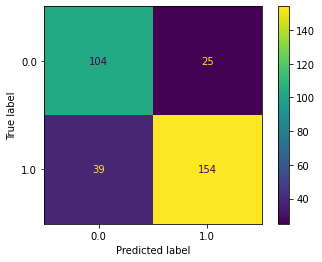

In [347]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_man, X_test, y_test)  
plt.show() 

In [348]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))



Accuracy Score:
0.8105590062111802


In [349]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


In [382]:
df_model = d.copy()#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler =RobustScaler()
features = [['age','trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

In [383]:
X = df_model.drop(['num'], axis=1).values
y = df_model['num'].values

In [384]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.35, random_state=42)

In [407]:
f_c = KNeighborsClassifier(n_neighbors =15, metric = 'euclidean', p = 2)
f_c = f_c.fit(X_train,y_train)
y_pred = f_c.predict(X_test)

In [408]:
print(accuracy_score(y_test, y_pred))


0.84472049689441


In [402]:
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,41):
    f_c = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan', p = 2)
    score=cross_val_score(f_c,X,y,cv=10)
    knn_scores.append(score.mean())

In [356]:
knn_scores


[0.6945652173913043,
 0.6695652173913043,
 0.7478260869565216,
 0.7402173913043478,
 0.7728260869565217,
 0.7717391304347827,
 0.7913043478260869,
 0.7923913043478261,
 0.7913043478260869,
 0.7869565217391303,
 0.791304347826087,
 0.7913043478260869,
 0.7934782608695652,
 0.7934782608695652,
 0.7902173913043479,
 0.7978260869565217,
 0.7934782608695652,
 0.7945652173913044,
 0.7989130434782609,
 0.8010869565217391,
 0.7989130434782609,
 0.8032608695652174,
 0.8010869565217392,
 0.8010869565217391,
 0.7989130434782608,
 0.7989130434782609,
 0.8010869565217391,
 0.8032608695652174,
 0.8043478260869567,
 0.8054347826086955,
 0.8010869565217392,
 0.8021739130434782,
 0.8010869565217391,
 0.8054347826086957,
 0.8032608695652174,
 0.8054347826086957,
 0.8032608695652174,
 0.8,
 0.8,
 0.7978260869565217]

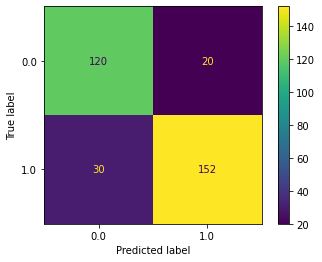

In [409]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(f_c, X_test, y_test)  
plt.show() 

In [411]:
cr = classification_report(y_test, y_pred)
print(cr) 

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       140
         1.0       0.88      0.84      0.86       182

    accuracy                           0.84       322
   macro avg       0.84      0.85      0.84       322
weighted avg       0.85      0.84      0.85       322



In [363]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
 metric_params=None, n_jobs=1, n_neighbors=14, p=1,
 weights='uniform')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [364]:
print(accuracy_score(y_test, y_pred))

0.8385093167701864


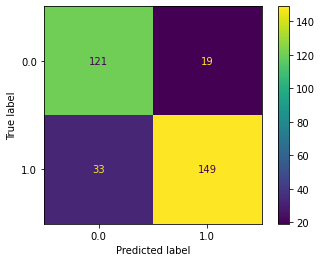

In [365]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  
plt.show() 

In [366]:
#List Hyperparameters to tune
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,20))
p=[1,2]#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)#Making model
clf = GridSearchCV(classifier_man, hyperparameters, cv=10)
best_model = clf.fit(X_train,y_train)#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])#Predict testing set
y_pred = best_model.predict(X_test)#Check performance using accuracy
print(accuracy_score(y_test, y_pred))

Best leaf_size: 1
Best p: 1
Best n_neighbors: 18
0.8354037267080745


In [358]:
cm

array([[117,  20,   3],
       [ 33,  54,   6],
       [ 10,  65,  14]], dtype=int64)

In [359]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=21)
rf = rf.fit(X_train,y_train)
score=cross_val_score(rf,X,y,cv=10)
score.mean()

0.7619565217391304

In [360]:
rf_scores=[]
for k in range(1,30):
    rf=RandomForestClassifier(n_estimators=k)
    score=cross_val_score(rf,X,y,cv=10)
    rf_scores.append(score.mean())

In [361]:
rf_scores

[0.6902173913043478,
 0.6608695652173913,
 0.7195652173913045,
 0.7043478260869566,
 0.726086956521739,
 0.7282608695652175,
 0.7608695652173914,
 0.7271739130434783,
 0.7369565217391305,
 0.7434782608695654,
 0.7630434782608696,
 0.7423913043478262,
 0.7456521739130435,
 0.7608695652173914,
 0.7695652173913043,
 0.75,
 0.75,
 0.7467391304347826,
 0.7576086956521739,
 0.7586956521739131,
 0.766304347826087,
 0.7597826086956522,
 0.7630434782608696,
 0.7630434782608695,
 0.7510869565217392,
 0.7608695652173914,
 0.7684782608695653,
 0.7565217391304347,
 0.7619565217391304]

In [362]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)  
plt.show() 

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Accuracy: 0.82


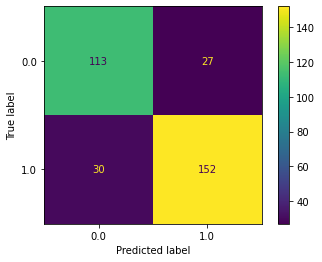

In [367]:
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix



clf = SVC(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

SVC(random_state=42)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

In [368]:
from sklearn import svm, datasets
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svc = svm.SVC(kernel=kernel).fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy: {:.2f}'.format(accuracy))



Accuracy: 0.81
Accuracy: 0.82
Accuracy: 0.80


In [369]:
gammas = [0.1, 1, 10, 100,1000]
for gamma in gammas:
    svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy: {:.2f}'.format(accuracy))


Accuracy: 0.82
Accuracy: 0.83
Accuracy: 0.58
Accuracy: 0.57
Accuracy: 0.57


In [370]:
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
    svc = svm.SVC(kernel='rbf', C=c).fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.83
Accuracy: 0.82
Accuracy: 0.83
Accuracy: 0.79
Accuracy: 0.75


In [371]:
degrees = [0, 1, 2, 3, 4, 5, 6]
for degree in degrees:
    svc = svm.SVC(kernel='poly', degree=degree).fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.57
Accuracy: 0.82
Accuracy: 0.80
Accuracy: 0.80
Accuracy: 0.80
Accuracy: 0.80
Accuracy: 0.79


In [372]:
svc = svm.SVC(kernel='rbf',degree=2,gamma=.1,C=1,random_state=2021).fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.82


In [ ]:
plot_confusion_matrix(svc, X_test, y_test)  
plt.show() 

In [373]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8198757763975155


In [374]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
sgdc = SGDClassifier(max_iter=1000, tol=0.01)
print(sgdc)

sgdc.fit(X_train, y_train)
score = sgdc.score(X_train, y_train)
print("Score: ", score)

ypred = sgdc.predict(X_test)

cm = confusion_matrix(y_test, ypred)
print(cm)

cr = classification_report(y_test, ypred)
print(cr) 

SGDClassifier(tol=0.01)
Score:  0.6237458193979933
[[ 37 103]
 [  6 176]]
              precision    recall  f1-score   support

         0.0       0.86      0.26      0.40       140
         1.0       0.63      0.97      0.76       182

    accuracy                           0.66       322
   macro avg       0.75      0.62      0.58       322
weighted avg       0.73      0.66      0.61       322



In [ ]:
import pickle


In [ ]:
with open("model1_predictis",'wb')as f:
    pickle.dump(classifier,f)

In [ ]:
GradientBoostingClassifier(criterion=’friedman_mse’, init=None,
 learning_rate=0.1, loss=’deviance’, max_depth=3,
 max_features=None, max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=100, presort=’auto’, random_state=None,
 subsample=1.0, verbose=0, warm_start=False)